# Analysis of stresser.gg Booter Website Leaked Database

First of all, thanks to [Ralph Horn](https://www.linkedin.com/in/%F0%9F%9A%81-ralph-h-686283105/) and [@CuratedIntel](https://twitter.com/CuratedIntel) for the data! You've made my Christmas!

December 2022, there was a large international law enforcement operation that took down 48 Websites that offered Distributed Denial of Service (DDoS) attacks as a paid service [[1]](https://www.justice.gov/usao-cdca/pr/federal-prosecutors-los-angeles-and-alaska-charge-6-defendants-operating-websites)[[2]](https://www.nationalcrimeagency.gov.uk/news/ddos-for-hire-services-taken-out-in-international-operation)[[3]](https://www.europol.europa.eu/media-press/newsroom/news/global-crackdown-against-ddos-services-shuts-down-most-popular-platforms). Anyone Googling for "booter", "stresser", "ddos-for-hire", and "ddos-as-a-service" would (still) find these Websites offering you to attack anyone for a few Dollars (sometimes even for free). One of the Booters that was took-down was ```stresser.gg```. I got the operational database of ```stresser.gg``` and this Jupyter Notebook is all about it.

![Current page of stresser.gg](https://github.com/jjsantanna/stresser.gg_db_analysis/blob/master/figs/seized_domain.png?raw=true)

Thanks to the Wayback Machine (Internet Archive), we can still show here how ```stresser.gg``` looks like before the takedown.

![https://web.archive.org/web/20221113174154/https://stresser.gg/](https://github.com/jjsantanna/stresser.gg_db_analysis/blob/master/figs/20221113_waybackmachine_stresser.gg.png?raw=true)

My PhD thesis/book was EXACTLY about investigating Booter Websites (publicly available at https://ris.utwente.nl/ws/portalfiles/portal/18494043/jjsantanna_thesis.pdf). The chapter 3 of my book explains how to analyse any Booter database. The chapter introduced a Github repository (https://github.com/jjsantanna/booter_dbs_analyses) that contains the semi-automated analysis of booters' databases. This following analysis is an extended version of it. To the ones that are new to Jupyter Notebook, this is basicaly a web-based code with anotation to make easy to read and reproduce.

## The file

In [1]:
dumpfile='data/stresse_xr.sql'

Number of lines in the file:

In [2]:
!wc -l $dumpfile

  154000 data/stresse_xr.sql


## Libraries that I use to analyse data

In [3]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np

from io import StringIO
import re

from IPython.display import display,clear_output

Loading some functions (ex. how to convert the data, how to enrich the data, ...)

In [4]:
%run 'scripts/additional_functions.ipynb'

 Functions loaded!!!!


<h2 align="center">
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br>
STEP 1: Adaptation to our Booter database schema<br>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</h2> 

## 1. Reading the first 'N' (100) lines of the input Booter database file
Yes, you could simply try to load it into a SQL database. I'm bitch of pandas and jupyter notebook!

In [5]:
lines_to_read=100

with open(dumpfile) as myfile:
    firstlines=myfile.readlines()[0:lines_to_read] #put here the interval you want
    for x in firstlines:
        print(x.strip())

-- phpMyAdmin SQL Dump
-- version 4.9.0.1
-- https://www.phpmyadmin.net/
--
-- Anamakine: localhost
-- Üretim Zamanı: 26 Mar 2022, 19:54:46
-- Sunucu sürümü: 10.3.22-MariaDB
-- PHP Sürümü: 7.2.34

SET SQL_MODE = "NO_AUTO_VALUE_ON_ZERO";
SET AUTOCOMMIT = 0;
START TRANSACTION;
SET time_zone = "+00:00";


/*!40101 SET @OLD_CHARACTER_SET_CLIENT=@@CHARACTER_SET_CLIENT */;
/*!40101 SET @OLD_CHARACTER_SET_RESULTS=@@CHARACTER_SET_RESULTS */;
/*!40101 SET @OLD_COLLATION_CONNECTION=@@COLLATION_CONNECTION */;
/*!40101 SET NAMES utf8mb4 */;

--
-- Veritabanı: `stresse_xr`
--

-- --------------------------------------------------------

--
-- Tablo için tablo yapısı `ayarlar`
--

CREATE TABLE `ayarlar` (
`id` int(11) NOT NULL,
`ad` text NOT NULL,
`description` text NOT NULL,
`keyword` text NOT NULL,
`smtp_host` text NOT NULL,
`smtp_username` text NOT NULL,
`smtp_mail` text NOT NULL,
`smtp_pass` text NOT NULL,
`bakim` int(11) NOT NULL DEFAULT 0,
`coinpayments_private` text NOT NULL,
`coinpayments_pu

## 2. Listing tables that have content inserted into the dump file

In [6]:
tables=enumerate(list_tables_with_insert(dumpfile))

for i, item in tables:
    print(i+1,item)

1 ayarlar
2 blacklist
3 destekcevap
4 destektalep
5 haberler
6 log
7 log
8 log
9 log
10 log
11 log
12 log
13 log
14 log
15 log
16 log
17 log
18 log
19 log
20 log
21 log
22 log
23 log
24 log
25 log
26 log
27 log
28 log
29 log
30 log
31 log
32 log
33 log
34 log
35 log
36 log
37 log
38 log
39 log
40 log
41 log
42 log
43 log
44 log
45 log
46 log
47 log
48 log
49 log
50 log
51 log
52 log
53 log
54 log
55 log
56 log
57 log
58 log
59 log
60 log
61 log
62 log
63 log
64 log
65 log
66 log
67 log
68 log
69 log
70 log
71 log
72 log
73 log
74 log
75 log
76 log
77 log
78 log
79 log
80 log
81 log
82 log
83 log
84 log
85 log
86 log
87 log
88 log
89 log
90 log
91 log
92 log
93 log
94 log
95 log
96 log
97 log
98 log
99 log
100 log
101 log
102 log
103 log
104 log
105 log
106 log
107 log
108 log
109 log
110 log
111 log
112 log
113 log
114 log
115 log
116 log
117 log
118 log
119 log
120 log
121 log
122 log
123 log
124 log
125 log
126 log
127 log
128 log
129 log
130 log
131 log
132 log
133 log
134 log
135 l

- The tables in the database contain Turkish language (detected by Google translate!)

**Tables:**
1. ayarlar -> settings
2. blacklist
3. destekcevap -> support reply
4. destektalep -> support request
5. haberler -> news
6. log
7. login
8. method
9. odeme -> payment
10. paketler -> packages
11. sunucular -> servers
12. user

<h2 align='center'>======================================================================
Adapting EACH existing table
======================================================================</h2>

## 6.1. Table: 'ayarlar' -> settings

### How this table looks like without modification?

In [7]:
tablename='ayarlar' #settings

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

<ipython-input-7-c2200a882508>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv(read_inserted_table1(dumpfile, tablename),


,id,ad,description,keyword,smtp_host,smtp_username,smtp_mail,smtp_pass,bakim,coinpayments_private,coinpayments_public,coinpayments_merchant,coinpayments_secret
0,1,Stresser.gg - Best IP Stresser / Free Booter 2021,Stresser.gg is the Most Powerful and Reliable IP Stresser / Booter in the Market. We offer 99.9% uptime on our service with untraceable &amp; strong attacks.,Stresser.ggBooter Stresser IP Stresser IP booter DDoSer DDoS tool DDoS Botnet Best Booter Best Stresser IP IP stresser IP booter IP source IP ip stresser vdos stresser vdos booter vdos source network stresser ipstresser booter stresser best drdosssyn dns amplification SSDP NTP ESSYN XSYN stress testing network booter network stressing Layer 4 Layer 7 ddos fivem fivem ddos gmod ddos mta ddos exploit,localhost,NaN,NaN,NaN,0,3c6f4dbEF099D4C90884b22421f560b0CaE6C5d5a9794Ec8c8c1d4b997ecF265,7899e3b19728dc3c763651ccc697151b668a4ee474344fdbd4ac8f42f708db99,067ecb2872c80858b98a9c9e8357b9a7,reallyprivatepassword31


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: settings
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o "ayarlar" => "settings"
    - On the column type/converter: 
        o 
    - On the column name:
        o "ad" => "name" 
    - Split columns:
        o 
    - Add required columns:
        o 

In [8]:
df_settings = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)


###Changing names of columns
df_settings.rename(columns = {'ad': 'name'}, inplace=True)

###Creating empty columns (with "" [for future string] or np.nan [for future float])


###Showing some lines after adapt the table
df_settings.head(10)

<ipython-input-8-ac5cbcb3bbd4>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_settings = pd.read_csv(read_inserted_table1(dumpfile, tablename),


,id,name,description,keyword,smtp_host,smtp_username,smtp_mail,smtp_pass,bakim,coinpayments_private,coinpayments_public,coinpayments_merchant,coinpayments_secret
0,1,Stresser.gg - Best IP Stresser / Free Booter 2021,Stresser.gg is the Most Powerful and Reliable IP Stresser / Booter in the Market. We offer 99.9% uptime on our service with untraceable &amp; strong attacks.,Stresser.ggBooter Stresser IP Stresser IP booter DDoSer DDoS tool DDoS Botnet Best Booter Best Stresser IP IP stresser IP booter IP source IP ip stresser vdos stresser vdos booter vdos source network stresser ipstresser booter stresser best drdosssyn dns amplification SSDP NTP ESSYN XSYN stress testing network booter network stressing Layer 4 Layer 7 ddos fivem fivem ddos gmod ddos mta ddos exploit,localhost,NaN,NaN,NaN,0,3c6f4dbEF099D4C90884b22421f560b0CaE6C5d5a9794Ec8c8c1d4b997ecF265,7899e3b19728dc3c763651ccc697151b668a4ee474344fdbd4ac8f42f708db99,067ecb2872c80858b98a9c9e8357b9a7,reallyprivatepassword31


## 6.2. Table: 'blacklist'

### How this table looks like without modification?

In [9]:
tablename='blacklist' #-> id matching value

# Only displaying the results
pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

<ipython-input-9-4239187831b6>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv(read_inserted_table1(dumpfile, tablename),


,id,eslesen,deger
0,2,1,.com.tr
1,3,1,.gov.tr
2,4,0,2.58.141.248
3,6,1,.gov
4,7,0,135.125.227.236
5,8,0,127.0.0.1
6,9,0,::1
7,10,0,localhost
8,11,1,.edu
9,12,0,195.62.32.126


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: blacklist
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 
        o    
    - On the column name:
        o eslesen => match
        o deger => ip #translates to "value"
    - Split columns:
        o 
    - Add required columns:
        o         

### Modifying table: 'blacklist'

In [10]:
df_blacklist = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)


###Changing names of columns
df_blacklist.rename(columns = {'eslesen': 'match',
                               'deger': 'ip'},
                         inplace=True)

###Creating empty columns (with "" [for future string] or np.nan [for future float])


###Showing some lines after adapt the table
df_blacklist.head(10)

<ipython-input-10-2797f1155978>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_blacklist = pd.read_csv(read_inserted_table1(dumpfile, tablename),


,id,match,ip
0,2,1,.com.tr
1,3,1,.gov.tr
2,4,0,2.58.141.248
3,6,1,.gov
4,7,0,135.125.227.236
5,8,0,127.0.0.1
6,9,0,::1
7,10,0,localhost
8,11,1,.edu
9,12,0,195.62.32.126


In [11]:
len(df_blacklist)

16

## 6.3. Table: 'destekcevap' #support reply

### How this table looks like without modification?

In [12]:
tablename='destekcevap' #support reply

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

<ipython-input-12-2e347ae81515>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv(read_inserted_table1(dumpfile, tablename),


,id,destekid,user,cevap,tarih
0,1,1,1,Sorry we do not accept paypal payments. Kind Regards,01/03/2022 (12:15:50
1,2,1,5060,f2f ...,01/03/2022 (13:27:12
2,3,3,1,Hello please send a message to my telegram account. @xerinio,06/03/2022 (00:09:25
3,4,5,1,Hello we will check the servers for you. Kind Regards,07/03/2022 (23:19:54
4,5,4,1,Hi you can buy high level plan or others.,07/03/2022 (23:41:54
5,6,7,1,Hello we are not able to whitelist. Use another IP or browser. Kind Regards,18/03/2022 (22:06:46
6,7,6,1,Hello Our Layer 4 servers can run into problems frequently. This problem will be completely resolved in the near future. Kind Regards,18/03/2022 (22:07:14
7,8,10,1,Hi no only cryptocoins.,20/03/2022 (22:00:50


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? NO
    - This table looks like: support_reply

#### Q3: Are there modifications required? 
    - On the table name: 
        o destekcevap => support_reply
    - On the column type: 
    - On the column name:
        o destekid => supportid
        o cevap => reply
        o tarih => date
    - Add required columns:
        o 
    - Split columns:
        o 

### Modifying table: 'support_reply'

In [13]:
### Loading the column converting columns with predefined functions
df_support_reply = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)
### Converting

###Changing names of columns
df_support_reply.rename(columns = {'destekid': 'supportid',
                                    'cevap': 'message', #reply
                                  'tarih':'date' },
                         inplace=True)

##Creating empty columns (with "" [for future string] or np.nan [for future float])
df_support_reply['date']= datetimestringparentesis2datetime(df_support_reply['date'])

###Showing some lines after adapt the table
df_support_reply.head(10)

<ipython-input-13-191cbd96508e>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_support_reply = pd.read_csv(read_inserted_table1(dumpfile, tablename),


,id,supportid,user,message,date
0,1,1,1,Sorry we do not accept paypal payments. Kind Regards,2022-03-01 12:15:50
1,2,1,5060,f2f ...,2022-03-01 13:27:12
2,3,3,1,Hello please send a message to my telegram account. @xerinio,2022-03-06 00:09:25
3,4,5,1,Hello we will check the servers for you. Kind Regards,2022-03-07 23:19:54
4,5,4,1,Hi you can buy high level plan or others.,2022-03-07 23:41:54
5,6,7,1,Hello we are not able to whitelist. Use another IP or browser. Kind Regards,2022-03-18 22:06:46
6,7,6,1,Hello Our Layer 4 servers can run into problems frequently. This problem will be completely resolved in the near future. Kind Regards,2022-03-18 22:07:14
7,8,10,1,Hi no only cryptocoins.,2022-03-20 22:00:50


In [14]:
len(df_support_reply)

8

## 6.4. Table: 'destektalep' (support request)

### How this table looks like without modification?

In [15]:
tablename='destektalep' # support_request

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

<ipython-input-15-f60cce6fba0c>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv(read_inserted_table1(dumpfile, tablename),


,id,user,baslik,icerik,durum,tarih,btarih
0,1,5060,Paypall,hello paypall balance add?,Closed,01/03/2022 (11:10:16,01/03/2022 (11:10:16
1,2,5335,hi,I found a vulnerability on your site\r\n PS telegram\r\nhttps://t.me/a_yangton,Closed,05/03/2022 (14:56:11,05/03/2022 (14:56:11
2,3,5240,adeversing,Hii got a plan for adeversing? my channel:https://www.youtube.com/c/ExiiExii123,Closed,05/03/2022 (23:28:08,05/03/2022 (23:28:08
3,4,5467,What plan purchase,I need to know how many concs I have to buy to get down some specific domains. And how do I know wich port enter in the attack settings?,Closed,06/03/2022 (04:27:05,06/03/2022 (04:27:05
4,5,5577,Hi,Hello why is not working anymore to stress the website? After payment the stresser does no longer work and I used the same methods as before.,Closed,07/03/2022 (12:50:53,07/03/2022 (12:50:53
5,6,5570,no power for nothing,I purschased a basic plan but it doesnt have power to down even a small home router...\r\nscam,Closed,12/03/2022 (06:15:47,12/03/2022 (06:15:47
6,7,23565,Api Access,Hi Whenever i try to go to api access tab cloudflare blocks me even if i solve captcha,Closed,15/03/2022 (19:51:52,15/03/2022 (19:51:52
7,8,5712,Problem with attack hub,need help,Closed,17/03/2022 (18:56:40,17/03/2022 (18:56:40
8,9,5712,Problem with attack hub,need help,Closed,17/03/2022 (18:56:40,17/03/2022 (18:56:40
9,10,24023,pay method,hi do u aceept paysafe ?,Closed,20/03/2022 (18:20:11,20/03/2022 (18:20:11


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: support_request

    
#### Q3: Are there modifications required? 
    - On the table name: 
        o destektalep => support_request
    - On the column type: 
        o    
    - On the column name:
        o baslik => title
        o icerik => message
        o durum => status
        o tarih => date
        o btarih is the same as date
    - Add required columns:
        o 
    - Split columns:
        o 

### Modifying table: 'df_support_reply'

In [16]:
### Loading the column converting columns with predefined functions
df_support_request = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)

###Changing names of columns
df_support_request.rename(columns = {'baslik': 'title',
                                    'icerik': 'message', #reply
                                  'durum': 'status',
                                  'tarih' : 'date'},
                         inplace=True)

###Creating empty columns (with "" [for future string] or np.nan [for future float])
df_support_request['date']= datetimestringparentesis2datetime(df_support_request['date'])


###Showing some lines after adapt the table
df_support_request.head(10)

<ipython-input-16-9f10c6287bbb>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_support_request = pd.read_csv(read_inserted_table1(dumpfile, tablename),


,id,user,title,message,status,date,btarih
0,1,5060,Paypall,hello paypall balance add?,Closed,2022-03-01 11:10:16,01/03/2022 (11:10:16
1,2,5335,hi,I found a vulnerability on your site\r\n PS telegram\r\nhttps://t.me/a_yangton,Closed,2022-03-05 14:56:11,05/03/2022 (14:56:11
2,3,5240,adeversing,Hii got a plan for adeversing? my channel:https://www.youtube.com/c/ExiiExii123,Closed,2022-03-05 23:28:08,05/03/2022 (23:28:08
3,4,5467,What plan purchase,I need to know how many concs I have to buy to get down some specific domains. And how do I know wich port enter in the attack settings?,Closed,2022-03-06 04:27:05,06/03/2022 (04:27:05
4,5,5577,Hi,Hello why is not working anymore to stress the website? After payment the stresser does no longer work and I used the same methods as before.,Closed,2022-03-07 12:50:53,07/03/2022 (12:50:53
5,6,5570,no power for nothing,I purschased a basic plan but it doesnt have power to down even a small home router...\r\nscam,Closed,2022-03-12 06:15:47,12/03/2022 (06:15:47
6,7,23565,Api Access,Hi Whenever i try to go to api access tab cloudflare blocks me even if i solve captcha,Closed,2022-03-15 19:51:52,15/03/2022 (19:51:52
7,8,5712,Problem with attack hub,need help,Closed,2022-03-17 18:56:40,17/03/2022 (18:56:40
8,9,5712,Problem with attack hub,need help,Closed,2022-03-17 18:56:40,17/03/2022 (18:56:40
9,10,24023,pay method,hi do u aceept paysafe ?,Closed,2022-03-20 18:20:11,20/03/2022 (18:20:11


In [17]:
len(df_support_request)

11

## Merging support_request and support_replay (and sort by id and date)

In [18]:
df_support_reply

,id,supportid,user,message,date
0,1,1,1,Sorry we do not accept paypal payments. Kind Regards,2022-03-01 12:15:50
1,2,1,5060,f2f ...,2022-03-01 13:27:12
2,3,3,1,Hello please send a message to my telegram account. @xerinio,2022-03-06 00:09:25
3,4,5,1,Hello we will check the servers for you. Kind Regards,2022-03-07 23:19:54
4,5,4,1,Hi you can buy high level plan or others.,2022-03-07 23:41:54
5,6,7,1,Hello we are not able to whitelist. Use another IP or browser. Kind Regards,2022-03-18 22:06:46
6,7,6,1,Hello Our Layer 4 servers can run into problems frequently. This problem will be completely resolved in the near future. Kind Regards,2022-03-18 22:07:14
7,8,10,1,Hi no only cryptocoins.,2022-03-20 22:00:50


In [19]:
df_support = pd.merge(df_support_request,
                      df_support_reply,
                      how = 'left',
                      left_on = 'id',
                      right_on = 'supportid')

In [20]:
df_support.head()

,id_x,user_x,title,message_x,status,date_x,btarih,id_y,supportid,user_y,message_y,date_y
0,1,5060,Paypall,hello paypall balance add?,Closed,2022-03-01 11:10:16,01/03/2022 (11:10:16,1.0,1.0,1.0,Sorry we do not accept paypal payments. Kind Regards,2022-03-01 12:15:50
1,1,5060,Paypall,hello paypall balance add?,Closed,2022-03-01 11:10:16,01/03/2022 (11:10:16,2.0,1.0,5060.0,f2f ...,2022-03-01 13:27:12
2,2,5335,hi,I found a vulnerability on your site\r\n PS telegram\r\nhttps://t.me/a_yangton,Closed,2022-03-05 14:56:11,05/03/2022 (14:56:11,NaN,NaN,NaN,NaN,NaT
3,3,5240,adeversing,Hii got a plan for adeversing? my channel:https://www.youtube.com/c/ExiiExii123,Closed,2022-03-05 23:28:08,05/03/2022 (23:28:08,3.0,3.0,1.0,Hello please send a message to my telegram account. @xerinio,2022-03-06 00:09:25
4,4,5467,What plan purchase,I need to know how many concs I have to buy to get down some specific domains. And how do I know wich port enter in the attack settings?,Closed,2022-03-06 04:27:05,06/03/2022 (04:27:05,5.0,4.0,1.0,Hi you can buy high level plan or others.,2022-03-07 23:41:54


## 6.5 Table: 'haberler' (news)

### How this table looks like without modification?

In [21]:
tablename='haberler' #news

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

<ipython-input-21-f84a04bc9ed5>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv(read_inserted_table1(dumpfile, tablename),


,id,baslik,yazi
0,1,Latest Updates,AMP lists and Layer 7 proxies have been updated.
1,2,Free Hub,We offer you a free trial the Free Hub is active. You can test our system from the Attack Hub section. We strongly recommend that you get a plan if it is not enough for you. Kind Regards
2,3,OVH method renewed!,We have made special length settings in the OVH-UDP method as well as updated the whitelist IPs.
3,4,API Access,We now offer API Access. If you have a plan you can create an API key and use it.
4,6,Layer 7,Our newly added Layer 7 [PREMIUM] methods can bypass protections like Cloudflare UAM and DDoS-GUARD.


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: news

#### Q3: Are there modifications required? 
    - On the table name: 
        o haberler => news
    - On the column type: 
        o 
    - On the column name:
        o baslik => title
        o yazi => message
    - Add required columns:
        o 
    - Split columns:
        o 

### Modifying table: 'df_news'

In [22]:
### Loading the column converting columns with predefined functions
df_news = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)

### Converting

###Changing names of columns
df_news.rename(columns = {'baslik': 'title',
                                    'yazi': 'message'},
                         inplace=True)

###Creating empty columns (with "" [for future string] or np.nan [for future float])

###Showing some lines after adapt the table
df_news.head(10)

<ipython-input-22-9474d0a4d75d>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_news = pd.read_csv(read_inserted_table1(dumpfile, tablename),


,id,title,message
0,1,Latest Updates,AMP lists and Layer 7 proxies have been updated.
1,2,Free Hub,We offer you a free trial the Free Hub is active. You can test our system from the Attack Hub section. We strongly recommend that you get a plan if it is not enough for you. Kind Regards
2,3,OVH method renewed!,We have made special length settings in the OVH-UDP method as well as updated the whitelist IPs.
3,4,API Access,We now offer API Access. If you have a plan you can create an API key and use it.
4,6,Layer 7,Our newly added Layer 7 [PREMIUM] methods can bypass protections like Cloudflare UAM and DDoS-GUARD.


## 6.6. Table: 'log' (MULTIPLE)

### How this table looks like without modification?

In [23]:
tablename='log'

pd.read_csv(read_inserted_table2(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

<ipython-input-23-9257237a9855>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv(read_inserted_table2(dumpfile, tablename),
<ipython-input-23-9257237a9855>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(read_inserted_table2(dumpfile, tablename),


,id,user,ip,port,sure,method,tarih,sonlanma,sunucu,saldiri,api
0,1,2,142.250.69.206,80.0,60.0,NaN,2021-11-09 01:41:50,2021-11-21 22:03:22,28.0,1.0,NaN
1,2,1,1.3.3.7,20.0,10.0,TCP-KILL,2021-11-09 01:42:25,2021-12-01 18:23:24,28.0,1.0,NaN
2,3,2,142.250.69.206,80.0,60.0,NaN,2021-11-09 01:43:14,2021-11-21 22:03:22,28.0,1.0,NaN
3,4,2,142.250.69.206,80.0,60.0,NaN,2021-11-09 01:44:44,2021-11-21 22:03:22,28.0,1.0,NaN
4,5,1,194.59.218.1,11.0,11.0,TCP-KILL,2021-11-10 21:14:36,2021-12-01 18:23:24,28.0,1.0,NaN
5,6,1,194.59.218.1,11.0,11.0,TCP-KILL,2021-11-10 21:14:54,2021-12-01 18:23:24,28.0,1.0,NaN
6,7,1,194.59.218.1,11.0,11.0,TCP-KILL,2021-11-10 21:15:10,2021-12-01 18:23:24,28.0,1.0,NaN
7,8,1,http://85.10.195.175,80.0,100.0,HTTP-GG,2021-11-11 11:30:01,2021-12-01 18:23:24,28.0,1.0,NaN
8,9,1,http://85.10.195.175,80.0,100.0,HTTP-GG,2021-11-11 11:33:38,2021-12-01 18:23:24,29.0,1.0,NaN
9,10,1,https://exitus.me,80.0,100.0,HTTP-GG,2021-11-11 11:34:18,2021-12-01 18:23:24,29.0,1.0,NaN


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: attacks

#### Q3: Are there modifications required? 
    - On the table name: 
        o log => attacks
    - On the column type: 
        o 
    - On the column name:
        o user => userid    
        o ip => targetip
        o sure => duration
        o method => type
        o tarih => date
        o sonlanma => end_date
        o sunucu => server
        o saldiri => attack
    - Add required columns:
        o 
    - Split columns:
        o 

### Modifying table: 'df_attacks'

In [24]:
df_attacks = pd.read_csv(read_inserted_table2(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False)

###Changing names of columns
df_attacks.rename(columns = {'user': 'userid',
                            'ip': 'targetip',
                            'sure':'duration',
                             'method': 'type',
                            'tarih':'date',
                            'sonlanma':'end_date',
                            'sunucu': 'server',
                            'saldiri': 'attack'},
                         inplace=True)

### Converting
df_attacks['date']= datetimeinvertedstring2datetime(df_attacks['date'])

###Creating empty columns (with "" [for future string] or np.nan [for future float])
# df_attacks['username'] = np.nan

###Showing some lines after adapt the table
df_attacks.head(10)


<ipython-input-24-a67c8c42a631>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_attacks = pd.read_csv(read_inserted_table2(dumpfile, tablename),
<ipython-input-24-a67c8c42a631>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_attacks = pd.read_csv(read_inserted_table2(dumpfile, tablename),


,id,userid,targetip,port,duration,type,date,end_date,server,attack,api
0,1,2,142.250.69.206,80.0,60.0,NaN,2021-11-09 01:41:50,2021-11-21 22:03:22,28.0,1.0,NaN
1,2,1,1.3.3.7,20.0,10.0,TCP-KILL,2021-11-09 01:42:25,2021-12-01 18:23:24,28.0,1.0,NaN
2,3,2,142.250.69.206,80.0,60.0,NaN,2021-11-09 01:43:14,2021-11-21 22:03:22,28.0,1.0,NaN
3,4,2,142.250.69.206,80.0,60.0,NaN,2021-11-09 01:44:44,2021-11-21 22:03:22,28.0,1.0,NaN
4,5,1,194.59.218.1,11.0,11.0,TCP-KILL,2021-11-10 21:14:36,2021-12-01 18:23:24,28.0,1.0,NaN
5,6,1,194.59.218.1,11.0,11.0,TCP-KILL,2021-11-10 21:14:54,2021-12-01 18:23:24,28.0,1.0,NaN
6,7,1,194.59.218.1,11.0,11.0,TCP-KILL,2021-11-10 21:15:10,2021-12-01 18:23:24,28.0,1.0,NaN
7,8,1,http://85.10.195.175,80.0,100.0,HTTP-GG,2021-11-11 11:30:01,2021-12-01 18:23:24,28.0,1.0,NaN
8,9,1,http://85.10.195.175,80.0,100.0,HTTP-GG,2021-11-11 11:33:38,2021-12-01 18:23:24,29.0,1.0,NaN
9,10,1,https://exitus.me,80.0,100.0,HTTP-GG,2021-11-11 11:34:18,2021-12-01 18:23:24,29.0,1.0,NaN


In [25]:
len(df_attacks),len(df_attacks.drop_duplicates())

(128333, 128333)

In [26]:
df_attacks['id'].value_counts()

1         2
15668     2
15666     2
15665     2
15664     2
         ..
50605     1
50604     1
50603     1
50602     1
104844    1
Name: id, Length: 104844, dtype: int64

In [27]:
df_attacks[df_attacks['id'] == 1]

,id,userid,targetip,port,duration,type,date,end_date,server,attack,api
0,1,2,142.250.69.206,80.0,60.0,NaN,2021-11-09 01:41:50,2021-11-21 22:03:22,28.0,1.0,NaN
104844,1,2,2021-11-09 01:40:23,fd01:5ca1:ab1e:8552:3451:b3f6:91e0:5585,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [28]:
df_attacks[df_attacks['id'] == 15668]

,id,userid,targetip,port,duration,type,date,end_date,server,attack,api
15667,15668,204,213.128.94.101,80.0,560.0,NTP,2021-12-18 22:35:32,2021-12-18 22:37:00,3.0,1.0,NaN
120511,15668,2567,2022-02-18 13:45:57,77.111.245.14,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [29]:
df_attacks[df_attacks['id'] == 15666]

,id,userid,targetip,port,duration,type,date,end_date,server,attack,api
15665,15666,204,213.128.94.100,80.0,560.0,LDAP,2021-12-18 22:32:58,2021-12-18 22:35:10,3.0,1.0,NaN
120509,15666,4172,2022-02-18 13:06:04,37.24.135.14,NaN,NaN,NaT,NaN,NaN,NaN,NaN


Drop any line with duration empty

In [30]:
df_attacks = df_attacks[df_attacks['duration'].notna()]

## 6.7. Table: 'login' (MULTIPLE)

### How this table looks like without modification?

In [31]:
tablename='login'

pd.read_csv(read_inserted_table2(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head()

<ipython-input-31-69746b745403>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv(read_inserted_table2(dumpfile, tablename),


,id,user,tarih,ip
0,1,2,2021-11-09 01:40:23,fd01:5ca1:ab1e:8552:3451:b3f6:91e0:5585
1,2,1,2021-11-09 01:40:24,88.224.98.78
2,3,1,2021-11-09 01:42:06,88.224.98.78
3,4,1,2021-11-09 02:52:13,88.224.98.78
4,5,1,2021-11-09 03:11:17,88.224.98.78


#### Q1: Is this table different from other previous loaded table? Yes
#### Q2: Is this table similar to any table in the generic Booter database schema? Yes
    - This table looks like: logins
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o login -> logins
    - On the column type: 
        o tarih -> timestamp2datetime
    - On the column name:
        o user -> userid
        o ip -> userip
        o tarih -> date
    - Add required columns:
        o        
    - Split columns:
        o 

### Modifying table: 'login'

In [32]:
### Loading the column converting columns with predefined functions
df_logins = pd.read_csv(read_inserted_table2(dumpfile, tablename),
                        delimiter=",",
                        error_bad_lines=False)

###Changing names of columns
df_logins.rename(columns = {'user':'userid',
                            'ip':'userip',
                            'tarih':'date'},inplace=True)

### Converting
df_logins['date']= datetimeinvertedstring2datetime(df_logins['date'])

###Creating empty columns (with "" [for future string] or np.nan [for future float])
#df_logins['username'] = np.nan

###Showing some lines after adapt the table
df_logins.head(10)

<ipython-input-32-d9fe0f635907>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_logins = pd.read_csv(read_inserted_table2(dumpfile, tablename),


,id,userid,date,userip
0,1,2,2021-11-09 01:40:23,fd01:5ca1:ab1e:8552:3451:b3f6:91e0:5585
1,2,1,2021-11-09 01:40:24,88.224.98.78
2,3,1,2021-11-09 01:42:06,88.224.98.78
3,4,1,2021-11-09 02:52:13,88.224.98.78
4,5,1,2021-11-09 03:11:17,88.224.98.78
5,6,1,2021-11-09 03:16:21,88.224.98.78
6,7,1,2021-11-09 03:32:52,88.224.98.78
7,8,1,2021-11-09 04:20:22,88.224.98.78
8,9,1,2021-11-09 04:26:38,88.224.98.78
9,10,1,2021-11-09 05:05:53,88.224.98.78


In [33]:
len(df_logins)

23489

## 6.8. Table: 'method'

### How this table looks like without modification?

In [34]:
tablename='method'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

<ipython-input-34-6efa2116aa80>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv(read_inserted_table1(dumpfile, tablename),


,id,user,ip,port,sure,method,tarih,sonlanma,sunucu,saldiri,api
0,1,2,142.250.69.206,80,60,NaN,2021-11-09 01:41:50,2021-11-21 22:03:22,28,1,NaN
1,2,1,1.3.3.7,20,10,TCP-KILL,2021-11-09 01:42:25,2021-12-01 18:23:24,28,1,NaN
2,3,2,142.250.69.206,80,60,NaN,2021-11-09 01:43:14,2021-11-21 22:03:22,28,1,NaN
3,4,2,142.250.69.206,80,60,NaN,2021-11-09 01:44:44,2021-11-21 22:03:22,28,1,NaN
4,5,1,194.59.218.1,11,11,TCP-KILL,2021-11-10 21:14:36,2021-12-01 18:23:24,28,1,NaN
5,6,1,194.59.218.1,11,11,TCP-KILL,2021-11-10 21:14:54,2021-12-01 18:23:24,28,1,NaN
6,7,1,194.59.218.1,11,11,TCP-KILL,2021-11-10 21:15:10,2021-12-01 18:23:24,28,1,NaN
7,8,1,http://85.10.195.175,80,100,HTTP-GG,2021-11-11 11:30:01,2021-12-01 18:23:24,28,1,NaN
8,9,1,http://85.10.195.175,80,100,HTTP-GG,2021-11-11 11:33:38,2021-12-01 18:23:24,29,1,NaN
9,10,1,https://exitus.me,80,100,HTTP-GG,2021-11-11 11:34:18,2021-12-01 18:23:24,29,1,NaN


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: attacks2
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o method => attacks2
    - On the column type: 
        o    
    - On the column name:
        o user => userid    
        o ip => targetip
        o sure => duration
        o method => type
        o tarih => date
        o sonlanma => end_date
        o sunucu => server
        o saldiri => attack
    - Add required columns:
        o 
    - Split columns:
        o 

### Modifying table: 'df_attacks2'

In [35]:
df_attacks2 = pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False)

### Converting

###Changing names of columns
df_attacks2.rename(columns = {'user': 'userid',
                            'ip': 'targetip',
                            'sure':'duration',
                             'method': 'type',
                            'tarih':'date',
                            'sonlanma':'end_date',
                            'sunucu': 'server',
                            'saldiri': 'attack'},
                         inplace=True)

### Converting
df_attacks2['date']= datetimeinvertedstring2datetime(df_attacks2['date'])
df_attacks2['end_date']= datetimeinvertedstring2datetime(df_attacks2['end_date'])

###Creating empty columns (with "" [for future string] or np.nan [for future float])
# df_attacks2['username'] = np.nan

###Showing some lines after adapt the table
df_attacks2.head(10)


<ipython-input-35-7758ebab0b96>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_attacks2 = pd.read_csv(read_inserted_table1(dumpfile, tablename),


,id,userid,targetip,port,duration,type,date,end_date,server,attack,api
0,1,2,142.250.69.206,80,60,NaN,2021-11-09 01:41:50,2021-11-21 22:03:22,28,1,NaN
1,2,1,1.3.3.7,20,10,TCP-KILL,2021-11-09 01:42:25,2021-12-01 18:23:24,28,1,NaN
2,3,2,142.250.69.206,80,60,NaN,2021-11-09 01:43:14,2021-11-21 22:03:22,28,1,NaN
3,4,2,142.250.69.206,80,60,NaN,2021-11-09 01:44:44,2021-11-21 22:03:22,28,1,NaN
4,5,1,194.59.218.1,11,11,TCP-KILL,2021-11-10 21:14:36,2021-12-01 18:23:24,28,1,NaN
5,6,1,194.59.218.1,11,11,TCP-KILL,2021-11-10 21:14:54,2021-12-01 18:23:24,28,1,NaN
6,7,1,194.59.218.1,11,11,TCP-KILL,2021-11-10 21:15:10,2021-12-01 18:23:24,28,1,NaN
7,8,1,http://85.10.195.175,80,100,HTTP-GG,2021-11-11 11:30:01,2021-12-01 18:23:24,28,1,NaN
8,9,1,http://85.10.195.175,80,100,HTTP-GG,2021-11-11 11:33:38,2021-12-01 18:23:24,29,1,NaN
9,10,1,https://exitus.me,80,100,HTTP-GG,2021-11-11 11:34:18,2021-12-01 18:23:24,29,1,NaN


In [36]:
len(df_attacks2)

461

In [37]:
df_attacks2['id'].value_counts()

1      1
318    1
316    1
315    1
314    1
      ..
151    1
150    1
149    1
148    1
461    1
Name: id, Length: 461, dtype: int64

## merging df_attacks with df_attacks2

In [38]:
df_attacks = pd.concat([df_attacks,df_attacks2])

Checking duplicates

In [39]:
df_attacks['id'].value_counts()

1         2
318       2
316       2
315       2
314       2
         ..
35252     1
35251     1
35250     1
35249     1
104844    1
Name: id, Length: 104843, dtype: int64

In [40]:
df_attacks[df_attacks['id']==1]

,id,userid,targetip,port,duration,type,date,end_date,server,attack,api
0,1,2,142.250.69.206,80.0,60.0,NaN,2021-11-09 01:41:50,2021-11-21 22:03:22,28.0,1.0,NaN
0,1,2,142.250.69.206,80,60.0,NaN,2021-11-09 01:41:50,2021-11-21 22:03:22,28.0,1.0,NaN


In [41]:
df_attacks[df_attacks['id']==136]

,id,userid,targetip,port,duration,type,date,end_date,server,attack,api
135,136,8,109.236.48.140,9139.0,200.0,TS3-KILL,2021-11-13 15:17:02,2021-11-18 22:41:24,1.0,1.0,NaN
135,136,8,109.236.48.140,9139,200.0,TS3-KILL,2021-11-13 15:17:02,2021-11-18 22:41:24,1.0,1.0,NaN


In [42]:
df_attacks[df_attacks['id']==138]

,id,userid,targetip,port,duration,type,date,end_date,server,attack,api
137,138,8,109.236.48.140,9141.0,200.0,TS3-KILL,2021-11-13 15:20:08,2021-11-18 22:41:24,1.0,1.0,NaN
137,138,8,109.236.48.140,9141,200.0,TS3-KILL,2021-11-13 15:20:08,2021-11-18 22:41:24,1.0,1.0,NaN


Solving duplicates

In [43]:
df_attacks = df_attacks.drop_duplicates(subset=['id', 'date'], keep='first')

In [44]:
df_attacks['id'].value_counts()

1         1
69893     1
69903     1
69902     1
69901     1
         ..
34947     1
34946     1
34945     1
34944     1
104844    1
Name: id, Length: 104843, dtype: int64

## 6.9. Table: 'odeme' (payments)

### How this table looks like without modification?

In [45]:
tablename='odeme'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

<ipython-input-45-717a37eb700d>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv(read_inserted_table1(dumpfile, tablename),


,id,user,miktar,tarih,durum,benzersiz
0,1,2,10,2021-11-09 01:49:36,0,2a10a1793740111
1,2,1,5,2021-11-10 03:40:24,0,1a5a1834027546
2,3,10,5,2021-11-13 16:14:18,0,10a5a293838229
3,4,20,222,2021-11-16 02:42:09,0,20a222a1229152109
4,5,22,50,2021-11-16 23:49:43,0,22a50a754382101
5,6,1,5,2021-11-17 03:13:27,0,1a5a1316182030
6,7,28,5,2021-11-17 06:20:44,0,28a5a2083623515
7,8,31,100,2021-11-17 12:24:58,0,31a100a406459315
8,9,32,11,2021-11-17 15:20:44,2,32a11a1998591613
9,10,1,5,2021-11-17 20:24:24,2,1a5a1138650649


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: payments
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o odeme => payments
    - On the column type: 
        o user => userid
        o miktar => amountpaid
        o tarih => date
        o durum => status
        o benzersiz => unique
    - On the column name:
        o  
    - Add required columns:
        o 
    - Split columns:
        o 

In [46]:
df_payments = pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False)

### Converting

###Changing names of columns
df_payments.rename(columns = {'user': 'userid',
                            'miktar': 'amountpaid',
                            'tarih':'date',
                             'durum': 'status',
                            'benzersiz':'unique'},
                         inplace=True)
### Converting
df_payments['date']= datetimeinvertedstring2datetime(df_payments['date'])

###Creating empty columns (with "" [for future string] or np.nan [for future float])

###Showing some lines after adapt the table
df_payments.head(10)


<ipython-input-46-77684685bf08>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_payments = pd.read_csv(read_inserted_table1(dumpfile, tablename),


,id,userid,amountpaid,date,status,unique
0,1,2,10,2021-11-09 01:49:36,0,2a10a1793740111
1,2,1,5,2021-11-10 03:40:24,0,1a5a1834027546
2,3,10,5,2021-11-13 16:14:18,0,10a5a293838229
3,4,20,222,2021-11-16 02:42:09,0,20a222a1229152109
4,5,22,50,2021-11-16 23:49:43,0,22a50a754382101
5,6,1,5,2021-11-17 03:13:27,0,1a5a1316182030
6,7,28,5,2021-11-17 06:20:44,0,28a5a2083623515
7,8,31,100,2021-11-17 12:24:58,0,31a100a406459315
8,9,32,11,2021-11-17 15:20:44,2,32a11a1998591613
9,10,1,5,2021-11-17 20:24:24,2,1a5a1138650649


In [47]:
len(df_payments)

278

Some payments looks weird (perhaps manual insert):
- df_payments[df_payments['amountpaid']=="68.8.76.127"]
- df_payments[df_payments['amountpaid']=="7DHsDpE6"]
- df_payments[df_payments['amountpaid']=="3000"]
- df_payments[df_payments['amountpaid']=="0222"]

## 6.10. Table: 'paketler' (packages)

### How this table looks like without modification?

In [48]:
tablename='paketler'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

<ipython-input-48-b6ebb945bc4f>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv(read_inserted_table1(dumpfile, tablename),


,id,ad,fiyat,sure,zaman,es_zaman,gunluk_limit,max_sure,node,power,anlik_saldir,isHidden,apiAccess
0,1,Admin,1337,1,Lifetime,50,5000,10000,VIP,NaN,1,1,1
1,12,Free,0,1,Lifetime,1,50,60,Free,NaN,1,1,0
2,13,Starter Pack,10,1,Month,1,1000,120,Classic,NaN,1,0,0
3,14,Advanced,25,1,Month,2,1000,360,Classic,NaN,1,0,0
4,15,High Level,35,1,Month,2,1000,560,VIP,NaN,1,0,1
5,16,Professional,55,1,Month,3,1000,760,VIP,NaN,1,0,1
6,17,Enterprise,75,1,Month,4,1000,960,VIP,NaN,1,0,1
7,18,Ultimate,90,1,Month,4,1000,1160,VIP,NaN,1,0,1
8,19,Platinum,125,1,Month,5,1000,1360,VIP,NaN,1,0,1
9,20,Business,150,1,Month,5,1000,1560,VIP,NaN,1,0,1


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: plans
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o paketler => plans
    - On the column type: 
        o  date => timestamptodate  
    - On the column name:
        o ad => name
        o fiyat => price 
        o sure => duration
        o zaman => time_unit
        o es_zaman => time_number
        o gunluk_limit => daily_limit
        o max_sure => max_duration
        o anlik_saldir => instant_attack
    - Add required columns:
        o 
    - Split columns:
        o 

### Modifying table: 'plans'

In [49]:
### Loading the column converting columns with predefined functions
df_plans = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)

### Converting


###Changing names of columns
df_plans.rename(columns = {'ad': 'name',
                              'fiyat': 'price',
                             'sure': 'duration',
                             'zaman':'time_unit',
                             'es_zaman':'time_number',
                             'gunluk_limit':'daily_limit',
                             'max_sure':'max_duration',
                             'anlik_saldir':'instant_attack'},
                         inplace=True)

###Creating empty columns (with "" [for future string] or np.nan [for future float])


###Showing some lines after adapt the table
df_plans.head(10)

<ipython-input-49-3b2e9cbbb8aa>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_plans = pd.read_csv(read_inserted_table1(dumpfile, tablename),


,id,name,price,duration,time_unit,time_number,daily_limit,max_duration,node,power,instant_attack,isHidden,apiAccess
0,1,Admin,1337,1,Lifetime,50,5000,10000,VIP,NaN,1,1,1
1,12,Free,0,1,Lifetime,1,50,60,Free,NaN,1,1,0
2,13,Starter Pack,10,1,Month,1,1000,120,Classic,NaN,1,0,0
3,14,Advanced,25,1,Month,2,1000,360,Classic,NaN,1,0,0
4,15,High Level,35,1,Month,2,1000,560,VIP,NaN,1,0,1
5,16,Professional,55,1,Month,3,1000,760,VIP,NaN,1,0,1
6,17,Enterprise,75,1,Month,4,1000,960,VIP,NaN,1,0,1
7,18,Ultimate,90,1,Month,4,1000,1160,VIP,NaN,1,0,1
8,19,Platinum,125,1,Month,5,1000,1360,VIP,NaN,1,0,1
9,20,Business,150,1,Month,5,1000,1560,VIP,NaN,1,0,1


In [50]:
len(df_plans)

17

## 6.11. Table: 'sunucular' (servers)

### How this table looks like without modification?

In [51]:
tablename='sunucular'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

<ipython-input-51-93a95c6ad087>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv(read_inserted_table1(dumpfile, tablename),


,id,paket,api,es_zaman,typex
0,22,1,http://api.xoapi.co/layer4-free.php?key=043a82891baaf1c21ea1785e545be7b4,5,4
1,26,0,http://api.xoapi.co/layer7v2.php?key=043a82891baaf1c21ea1785e545be7b4,15,7
2,27,0,http://api.xoapi.co/ipsL4v2.php?key=043a82891baaf1c21ea1785e545be7b4,3,4


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: servers
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 

    - On the column name:
        o paket => package
        o es_zaman => time
        o typex => atack_layer
    - Add required columns:
        o 
    - Split columns:
        o 

### Modifying table: 'servers'

In [52]:
### Loading the column converting columns with predefined functions
df_servers = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)


###Changing names of columns
df_servers.rename(columns = {'paket': 'package',
                          'es_zaman': 'time',
                          'typex':'atack_layer'},
                         inplace=True)

###Creating empty columns (with "" [for future string] or np.nan [for future float])


###Showing some lines after adapt the table
df_servers.head(10)

<ipython-input-52-f2b808d9e660>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_servers = pd.read_csv(read_inserted_table1(dumpfile, tablename),


,id,package,api,time,atack_layer
0,22,1,http://api.xoapi.co/layer4-free.php?key=043a82891baaf1c21ea1785e545be7b4,5,4
1,26,0,http://api.xoapi.co/layer7v2.php?key=043a82891baaf1c21ea1785e545be7b4,15,7
2,27,0,http://api.xoapi.co/ipsL4v2.php?key=043a82891baaf1c21ea1785e545be7b4,3,4


## 6.12. Table: 'user' (MULTIPLE)

### How this table looks like without modification?

In [53]:
tablename='user'

pd.read_csv(read_inserted_table2(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).tail(10)

<ipython-input-53-27912b9ef2e7>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv(read_inserted_table2(dumpfile, tablename),
<ipython-input-53-27912b9ef2e7>:3: DtypeWarning: Columns (3,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(read_inserted_table2(dumpfile, tablename),


,id,ad,description,keyword,smtp_host,smtp_username,smtp_mail,smtp_pass,bakim,coinpayments_private,coinpayments_public,coinpayments_merchant,coinpayments_secret
153122,24495,rosenkostov907@gmail.com,rosen_0121,0,72cf6b22a3266584070e0132f19c6c40,0,12,0,77.85.204.157,2022-03-26 20:05:58,0122,NaN,0.0.0.0
153123,24496,libsrc@ya.ru,libsrc,0,d13e5d3b8adffad4396fe155f444a71d,0,12,0,130.162.53.194,2022-03-26 20:12:49,1235,NaN,0.0.0.0
153124,24497,locallmao@xkx.me,testuser1337,0,25f9e794323b453885f5181f1b624d0b,0,12,0,2402:800:63f9:d93b:5413:626d:de54:1a3f,2022-03-26 20:33:20,1137,NaN,0.0.0.0
153125,24498,koalabranchyt@outlook.com,wniiii,0,6b7e5c4914c9b667760c225e518fb6b6,0,12,0,2603:3014:242c:0:19c:5b45:fe5a:c923,2022-03-26 20:39:40,1195,NaN,0.0.0.0
153126,24499,assault234yy@gmail.com,nerzox gaming,0,327e187aa22d40b6b49cdc3cd8894e2a,0,12,0,66.131.6.194,2022-03-26 21:02:32,1920,NaN,0.0.0.0
153127,24500,waterdog299@gmail.com,ALMONDTEED,0,a28260015a1310bde8f8973f70098d23,0,12,0,NaN,NaN,21,NaN,0.0.0.0
153128,24501,maszm93@Gmail.com,szust,0,52c3b8e81e4596d4cc0b4f7ab299968f,0,12,0,195.116.20.24,2022-03-26 21:54:44,123,NaN,0.0.0.0
153129,24502,teamiemattt@gmail.com,teamiemattt,0,d1967abf81c0b59d1ec7033a82161d67,0,12,0,62.250.230.231,2022-03-26 22:21:59,1555,NaN,0.0.0.0
153130,24503,kankerneger@kankerneger.nl,kankerneger69,0,265309790dfcc652d3315125cbb8dccb,0,12,0,107.189.30.22,2022-03-26 22:39:16,1337,NaN,0.0.0.0
153131,24504,root@root.com,rootboy,0,f0a04891a6e9c4cbfb67566b11414c82,0,12,0,2.56.59.74,2022-03-26 22:51:52,1597,NaN,0.0.0.0


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: users 
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o user => users
    - On the column type: 
        o    
    - On the column name:
        o id => userid
        o ad => useremail
        o description => username
        o bakim => ip        
    - Add required columns:
        o 
    - Split columns:
        o 

### Modifying table: 'users'

In [54]:
### Loading the column converting columns with predefined functions
df_users = pd.read_csv(read_inserted_table2(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)

###Changing names of columns
df_users.rename(columns = {'id': 'userid',
                            'ad': 'useremail',
                          'description':'username',
                          'bakim': 'ip'},
                         inplace=True)

### Converting
df_users['coinpayments_private']= datetimeinvertedstring2datetime(df_users['coinpayments_private'])

###Showing some lines after adapt the table
df_users.head(10)

<ipython-input-54-461ceb5dc365>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_users = pd.read_csv(read_inserted_table2(dumpfile, tablename),
<ipython-input-54-461ceb5dc365>:2: DtypeWarning: Columns (3,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_users = pd.read_csv(read_inserted_table2(dumpfile, tablename),


,userid,useremail,username,keyword,smtp_host,smtp_username,smtp_mail,smtp_pass,ip,coinpayments_private,coinpayments_public,coinpayments_merchant,coinpayments_secret
0,1,Stresser.gg - Best IP Stresser / Free Booter 2021,Stresser.gg is the Most Powerful and Reliable IP Stresser / Booter in the Market. We offer 99.9% uptime on our service with untraceable &amp; strong attacks.,Stresser.ggBooter Stresser IP Stresser IP booter DDoSer DDoS tool DDoS Botnet Best Booter Best Stresser IP IP stresser IP booter IP source IP ip stresser vdos stresser vdos booter vdos source network stresser ipstresser booter stresser best drdosssyn dns amplification SSDP NTP ESSYN XSYN stress testing network booter network stressing Layer 4 Layer 7 ddos fivem fivem ddos gmod ddos mta ddos exploit,localhost,NaN,NaN,NaN,0.0,NaT,7899e3b19728dc3c763651ccc697151b668a4ee474344fdbd4ac8f42f708db99,067ecb2872c80858b98a9c9e8357b9a7,reallyprivatepassword31
1,1,1,1,Sorry we do not accept paypal payments. Kind Regards,01/03/2022 (12:15:50,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,2,1,5060,f2f ...,01/03/2022 (13:27:12,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,3,3,1,Hello please send a message to my telegram account. @xerinio,06/03/2022 (00:09:25,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,4,5,1,Hello we will check the servers for you. Kind Regards,07/03/2022 (23:19:54,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
5,5,4,1,Hi you can buy high level plan or others.,07/03/2022 (23:41:54,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
6,6,7,1,Hello we are not able to whitelist. Use another IP or browser. Kind Regards,18/03/2022 (22:06:46,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
7,7,6,1,Hello Our Layer 4 servers can run into problems frequently. This problem will be completely resolved in the near future. Kind Regards,18/03/2022 (22:07:14,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
8,8,10,1,Hi no only cryptocoins.,20/03/2022 (22:00:50,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
9,1,5060,Paypall,hello paypall balance add?,Closed,01/03/2022 (11:10:16,01/03/2022 (11:10:16,NaN,NaN,NaT,NaN,NaN,NaN


Discovering the user with userid==1:

In [55]:
df_users[df_users['userid']==1]

,userid,useremail,username,keyword,smtp_host,smtp_username,smtp_mail,smtp_pass,ip,coinpayments_private,coinpayments_public,coinpayments_merchant,coinpayments_secret
0,1,Stresser.gg - Best IP Stresser / Free Booter 2021,Stresser.gg is the Most Powerful and Reliable IP Stresser / Booter in the Market. We offer 99.9% uptime on our service with untraceable &amp; strong attacks.,Stresser.ggBooter Stresser IP Stresser IP booter DDoSer DDoS tool DDoS Botnet Best Booter Best Stresser IP IP stresser IP booter IP source IP ip stresser vdos stresser vdos booter vdos source network stresser ipstresser booter stresser best drdosssyn dns amplification SSDP NTP ESSYN XSYN stress testing network booter network stressing Layer 4 Layer 7 ddos fivem fivem ddos gmod ddos mta ddos exploit,localhost,NaN,NaN,NaN,0.0,NaT,7899e3b19728dc3c763651ccc697151b668a4ee474344fdbd4ac8f42f708db99,067ecb2872c80858b98a9c9e8357b9a7,reallyprivatepassword31
1,1,1,1,Sorry we do not accept paypal payments. Kind Regards,01/03/2022 (12:15:50,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
9,1,5060,Paypall,hello paypall balance add?,Closed,01/03/2022 (11:10:16,01/03/2022 (11:10:16,NaN,NaN,NaT,NaN,NaN,NaN
20,1,2,142.250.69.206,80,60,NaN,2021-11-09 01:41:50,2021-11-21 22:03:22,28.0,NaT,NaN,NaN,NaN
104864,1,2,2021-11-09 01:40:23,fd01:5ca1:ab1e:8552:3451:b3f6:91e0:5585,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
128353,1,2,10,2021-11-09 01:49:36,0,2a10a1793740111,NaN,NaN,NaN,NaT,NaN,NaN,NaN
128631,1,xerinio@stresser.gg,xerinio,10,c787f6e1aecfe96fd2c2e87606c908ca,1,12,0,176.88.96.229,2022-03-26 21:46:16,133751241421515132512421212151242131133751241421515132512421212151242131,F4YYE-z7Vk3-Y3JWu-SC04X-dQP4s,85.108.112.247


Dropping all lines from 0 till 128631! and resetting index.

In [56]:
df_users = df_users.drop(df_users.index[0:128631]).reset_index(drop=True)

checking whether all values are unique:

In [57]:
df_users['userid'].value_counts()

1        1
16335    1
16344    1
16343    1
16342    1
        ..
8169     1
8168     1
8167     1
8166     1
24504    1
Name: userid, Length: 24501, dtype: int64

## Adding the username (from df_users) into attacks, logins, payments and support (because these only have userid)

In [58]:
df_attacks = pd.merge(df_attacks, df_users[['userid','useremail','username']], on='userid')
df_logins = pd.merge(df_logins, df_users[['userid','useremail','username']], on='userid')
df_payments = pd.merge(df_payments, df_users[['userid','useremail','username']], on='userid')
df_support = pd.merge(df_support, df_users[['userid','useremail','username']], left_on='user_x', right_on='userid')

<h2 align='center'>======================================================================
<br>Final step of the manual part
======================================================================</h2>

In [60]:
%run 'scripts/reviewing_consistency.ipynb'



Overview of records in the adapted Booter database:


,df_users,df_logins,df_attacks,df_payments,df_settings,df_gateways,df_friendsenemies,df_blacklist,df_webshells,df_servers,df_plans
0,24501,23488,104842,278,1,0,0,16,0,3,17




Overview in latex format for copy-&-paste:

\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &  users &  logins &  attacks &  payments &  settings &  gateways &  friendsenemies &  blacklist &  webshells &  servers &  plans \\
\midrule
0 &  24501 &   23488 &   104842 &       278 &         1 &         0 &               0 &         16 &          0 &        3 &     17 \\
\bottomrule
\end{tabular}



<ipython-input-60-1d37795d049b>:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print (pd.DataFrame({'users' : len(df_users),


In [68]:
df_logins['date'].agg(['min','max']),\
df_payments['date'].agg(['min','max']),\
df_attacks['date'].agg(['min','max'])

(min   2021-11-09 01:40:23
 max   2022-03-26 22:51:57
 Name: date, dtype: datetime64[ns],
 min   2021-11-09 01:49:36
 max   2022-03-26 22:52:11
 Name: date, dtype: datetime64[ns],
 min   2021-11-09 01:41:50
 max   2022-03-26 22:54:35
 Name: date, dtype: datetime64[ns])

## Statistics before enrichment

In [ ]:
len(df_attacks['id'].value_counts()),len(df_attacks)

Distinct users that performed 1 or more payments

In [89]:
len(df_payments['userid'].value_counts())

173

<h2 align="center">
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br>
STEP 2: Data Enrichment<br>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</h2> 

In [179]:
%run 'scripts/data_enrichment.ipynb'

- Table logins enriched (Tor checked): df_logins_torcheck
- Table attacks enriched (Tor checked): df_attacks_torcheck
- Table friendsenemies enriched (Tor checked): df_friendsenemies_torcheck
- Table blacklist enriched (Tor checked): df_blacklist_torcheck


In [180]:
import subprocess
import cfscrape
from lxml import etree
import os.path
import random
import time 

Defining a "mid" date for data enrichment purposes

In [181]:
try:
    try:
        middle_date=(min(df_attacks['date'])+((max(df_attacks['date'])-min(df_attacks['date']))/2))
        raise
    except Exception:
        pass

    try:
        middle_date=(min(df_logins['date'])+((max(df_logins['date'])-min(df_logins['date']))/2))
        raise
    except Exception:
        pass

    try:
        middle_date=(min(df_payments['date'])+((max(df_payments['date'])-min(df_payments['date']))/2))
        raise
    except:
        pass
except Exception:
    print("There is no date in the entire dataset")

date_tor_check = middle_date.strftime('%Y-%m-%d')
date_iptoasn_lookup= str(middle_date)

In [182]:
df_logins['middledate']=date_iptoasn_lookup
df_attacks['middledate']=date_iptoasn_lookup
df_friendsenemies['middledate']=date_iptoasn_lookup
df_blacklist['middledate']=date_iptoasn_lookup

## Enriching IP to ASN (using teamcymru)

In [73]:
!netcat whois.cymru.com 43 < enrichments/attacks_iptoasn_in > enrichments/attacks_iptoasn_out

In [74]:
!netcat whois.cymru.com 43 < enrichments/blacklist_iptoasn_in > enrichments/blacklist_iptoasn_out

In [75]:
!netcat whois.cymru.com 43 < enrichments/logins_iptoasn_in > enrichments/logins_iptoasn_out

## Reading and merging enriched information

In [117]:
df_logins_iptoasn = pd.read_csv('enrichments/logins_iptoasn_out',\
                                skiprows=1,\
                             delimiter="\s+\|\s",\
                                engine='python',\
                             names = ['asn', 'ip', 'bgp_prefix', 'country','registry','info_date','info_request','as_name'])

checking IP with multiple ASN info

In [118]:
df_logins_iptoasn['ip'].value_counts()

78.185.135.73                              2
78.174.106.59                              2
85.107.79.242                              2
174.252.129.111                            2
2403:6200:8851:25e3:d8d5:788e:8f34:c27a    2
                                          ..
2a01:cb18:81a2:c100:c876:e9d7:b32:f777     1
185.174.209.203                            1
151.135.217.27                             1
178.17.167.181                             1
2.56.59.74                                 1
Name: ip, Length: 12528, dtype: int64

In [119]:
df_logins_iptoasn[df_logins_iptoasn['ip']=='78.185.135.73']

,asn,ip,bgp_prefix,country,registry,info_date,info_request,as_name
5371,9121.0,78.185.135.73,78.185.128.0/21,TR,ripencc,2007-05-01,2022-01-17 00:20:53.500000,"TTNET, TR"
5372,47331.0,78.185.135.73,78.185.128.0/21,TR,ripencc,2007-05-01,2022-01-17 00:20:53.500000,"TTNET, TR"


In [120]:
df_logins_iptoasn[df_logins_iptoasn['ip']=='85.107.79.242']

,asn,ip,bgp_prefix,country,registry,info_date,info_request,as_name
8423,9121.0,85.107.79.242,85.107.72.0/21,TR,ripencc,2004-09-20,2022-01-17 00:20:53.500000,"TTNET, TR"
8424,47331.0,85.107.79.242,85.107.72.0/21,TR,ripencc,2004-09-20,2022-01-17 00:20:53.500000,"TTNET, TR"


In [127]:
df_logins_iptoasn = df_logins_iptoasn.groupby('ip').agg({'asn':list,'country':'first','as_name':'first','bgp_prefix':'first'}).reset_index()


In [128]:

df_logins_extended= pd.merge(df_logins,
                              df_logins_iptoasn,
                              how = 'left',
                              left_on = 'userip',
                              right_on = 'ip')

# Changing name of columns to avoid misunderstandings
df_logins_extended.rename(columns={'asn':'srcasn', 
                                   'ip':'srcip', 
                                   'bgp_prefix':'srcbgp_prefix', 
                                   'country':'srccountry' ,
                                   'registry':'srcregistry',
                                   'info_date':'srcinfo_date',
                                   'info_request':'srcinfo_request'},
                         inplace=True)

In [129]:
len(df_logins),len(df_logins_iptoasn),len(df_logins_extended)

(23488, 12528, 23488)

In [130]:
df_attacks_iptoasn = pd.read_csv('enrichments/attacks_iptoasn_out',\
                                skiprows=1,\
                             delimiter=r"\s+\|\s",\
                                 engine='python',\
                             names = ['asn', 'ip', 'bgp_prefix', 'country','registry','info_date','info_request','as_name'])

df_attacks_iptoasn = df_attacks_iptoasn.groupby('ip').agg({'asn':list,'country':'first','as_name':'first','bgp_prefix':'first'}).reset_index()


# Merging the iptoasn with the queried column
df_attacks_extended= pd.merge(df_attacks,
                              df_attacks_iptoasn,
                              how = 'left',
                              left_on = 'targetip',
                              right_on = 'ip')

# Changing name of columns to avoid misunderstandings
df_attacks_extended.rename(columns={'asn':'targetasn', 
                                   'ip_y':'targetip', 
                                   'bgp_prefix':'targetbgp_prefix', 
                                   'country_y':'targetcountry' ,
                                   'registry':'targetregistry',
                                   'info_date':'targetinfo_date',
                                   'info_request':'targetinfo_request'},
                         inplace=True)

In [131]:
len(df_attacks),len(df_attacks_iptoasn),len(df_attacks_extended)

(104842, 17627, 104842)

The "df_attacks_extended" has more entries than "df_attacks" because some IP addresses have multiple info regarding ASN

In [132]:
df_blacklist_iptoasn = pd.read_csv('enrichments/blacklist_iptoasn_out',\
                                skiprows=1,\
                             delimiter="\s+\|\s",\
                                   engine='python',\
                             names = ['asn', 'ip', 'bgp_prefix', 'country','registry','info_date','info_request','as_name'])

df_blacklist_iptoasn = df_blacklist_iptoasn.groupby('ip').agg({'asn':list,'country':'first','as_name':'first','bgp_prefix':'first'}).reset_index()



# Merging the iptoasn with the queried column
df_blacklist_extended= pd.merge(df_blacklist,
                              df_blacklist_iptoasn,
                              how = 'left',
                              left_on = 'ip',
                              right_on = 'ip')

# Changing name of columns to avoid misunderstandings
df_blacklist_extended.rename(columns={'asn':'blacklistasn', 
                                   'ip':'blacklistip', 
                                   'bgp_prefix':'blacklistbgp_prefix', 
                                   'country':'blacklistcountry' ,
                                   'registry':'blacklistregistry',
                                   'info_date':'blacklistinfo_date',
                                   'info_request':'blacklistinfo_request',
                                   'as_name': 'blacklistas_name'},
                         inplace=True)

In [133]:
len(df_blacklist),len(df_blacklist_iptoasn),len(df_blacklist_extended)

(16, 8, 16)

<h2 align="center">
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br>
STEP 3: Automatic Analysis<br>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</h2> 

1. Attacks per day


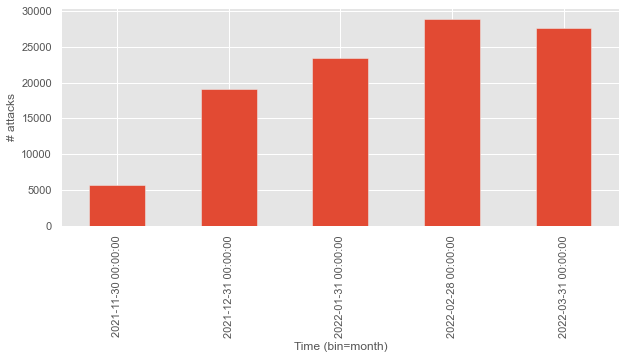

2. Number of attacks performed by users


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


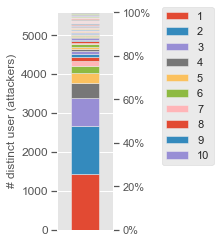

3. Attacks on the same target


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


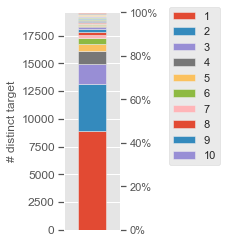

4. Intersection between users, customers and attackers.


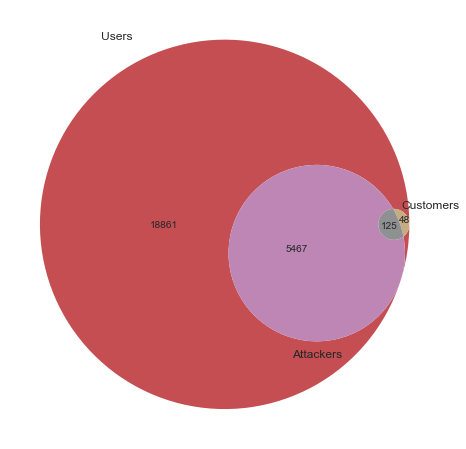

5. User login times


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


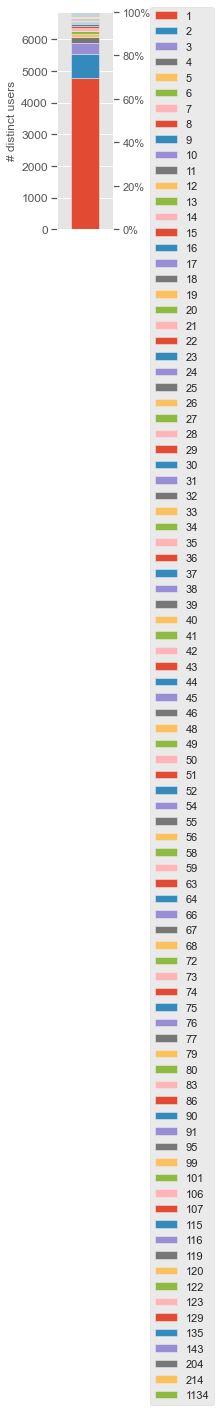



6. From 104842 total attack records, 104842 have a login time to be correlated with. The difference between the attack and the closest login time is on average 2 days 04:17:27.651275252, while the median is equal to 0 days 00:20:32


7. The number of distinct users that access this Booter via TOR is equal to 11


8. User distinct IP addresses


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


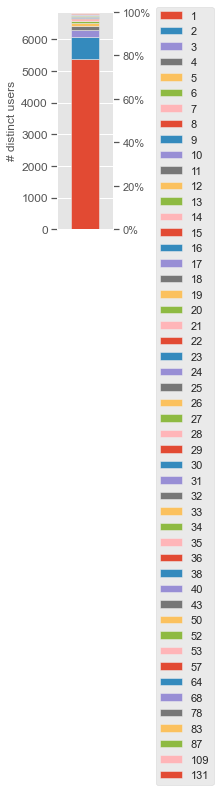

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


9. User distinct payments


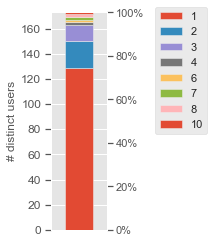

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


10. Amount of money paid.


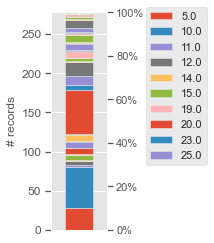



11. The (estimated) amount of money earned by this Booter is equal to US$ 21,484.00


12. Countries from where users (IPs) accessed the Booter.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


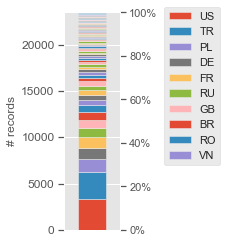

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


13. Countries of blacklisted IPs.


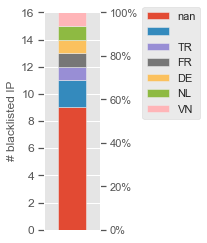

14. Target (IP) countries.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


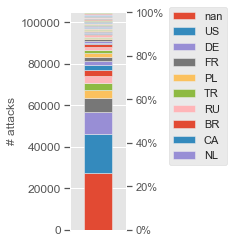

16. Who attacked whom in the country level.


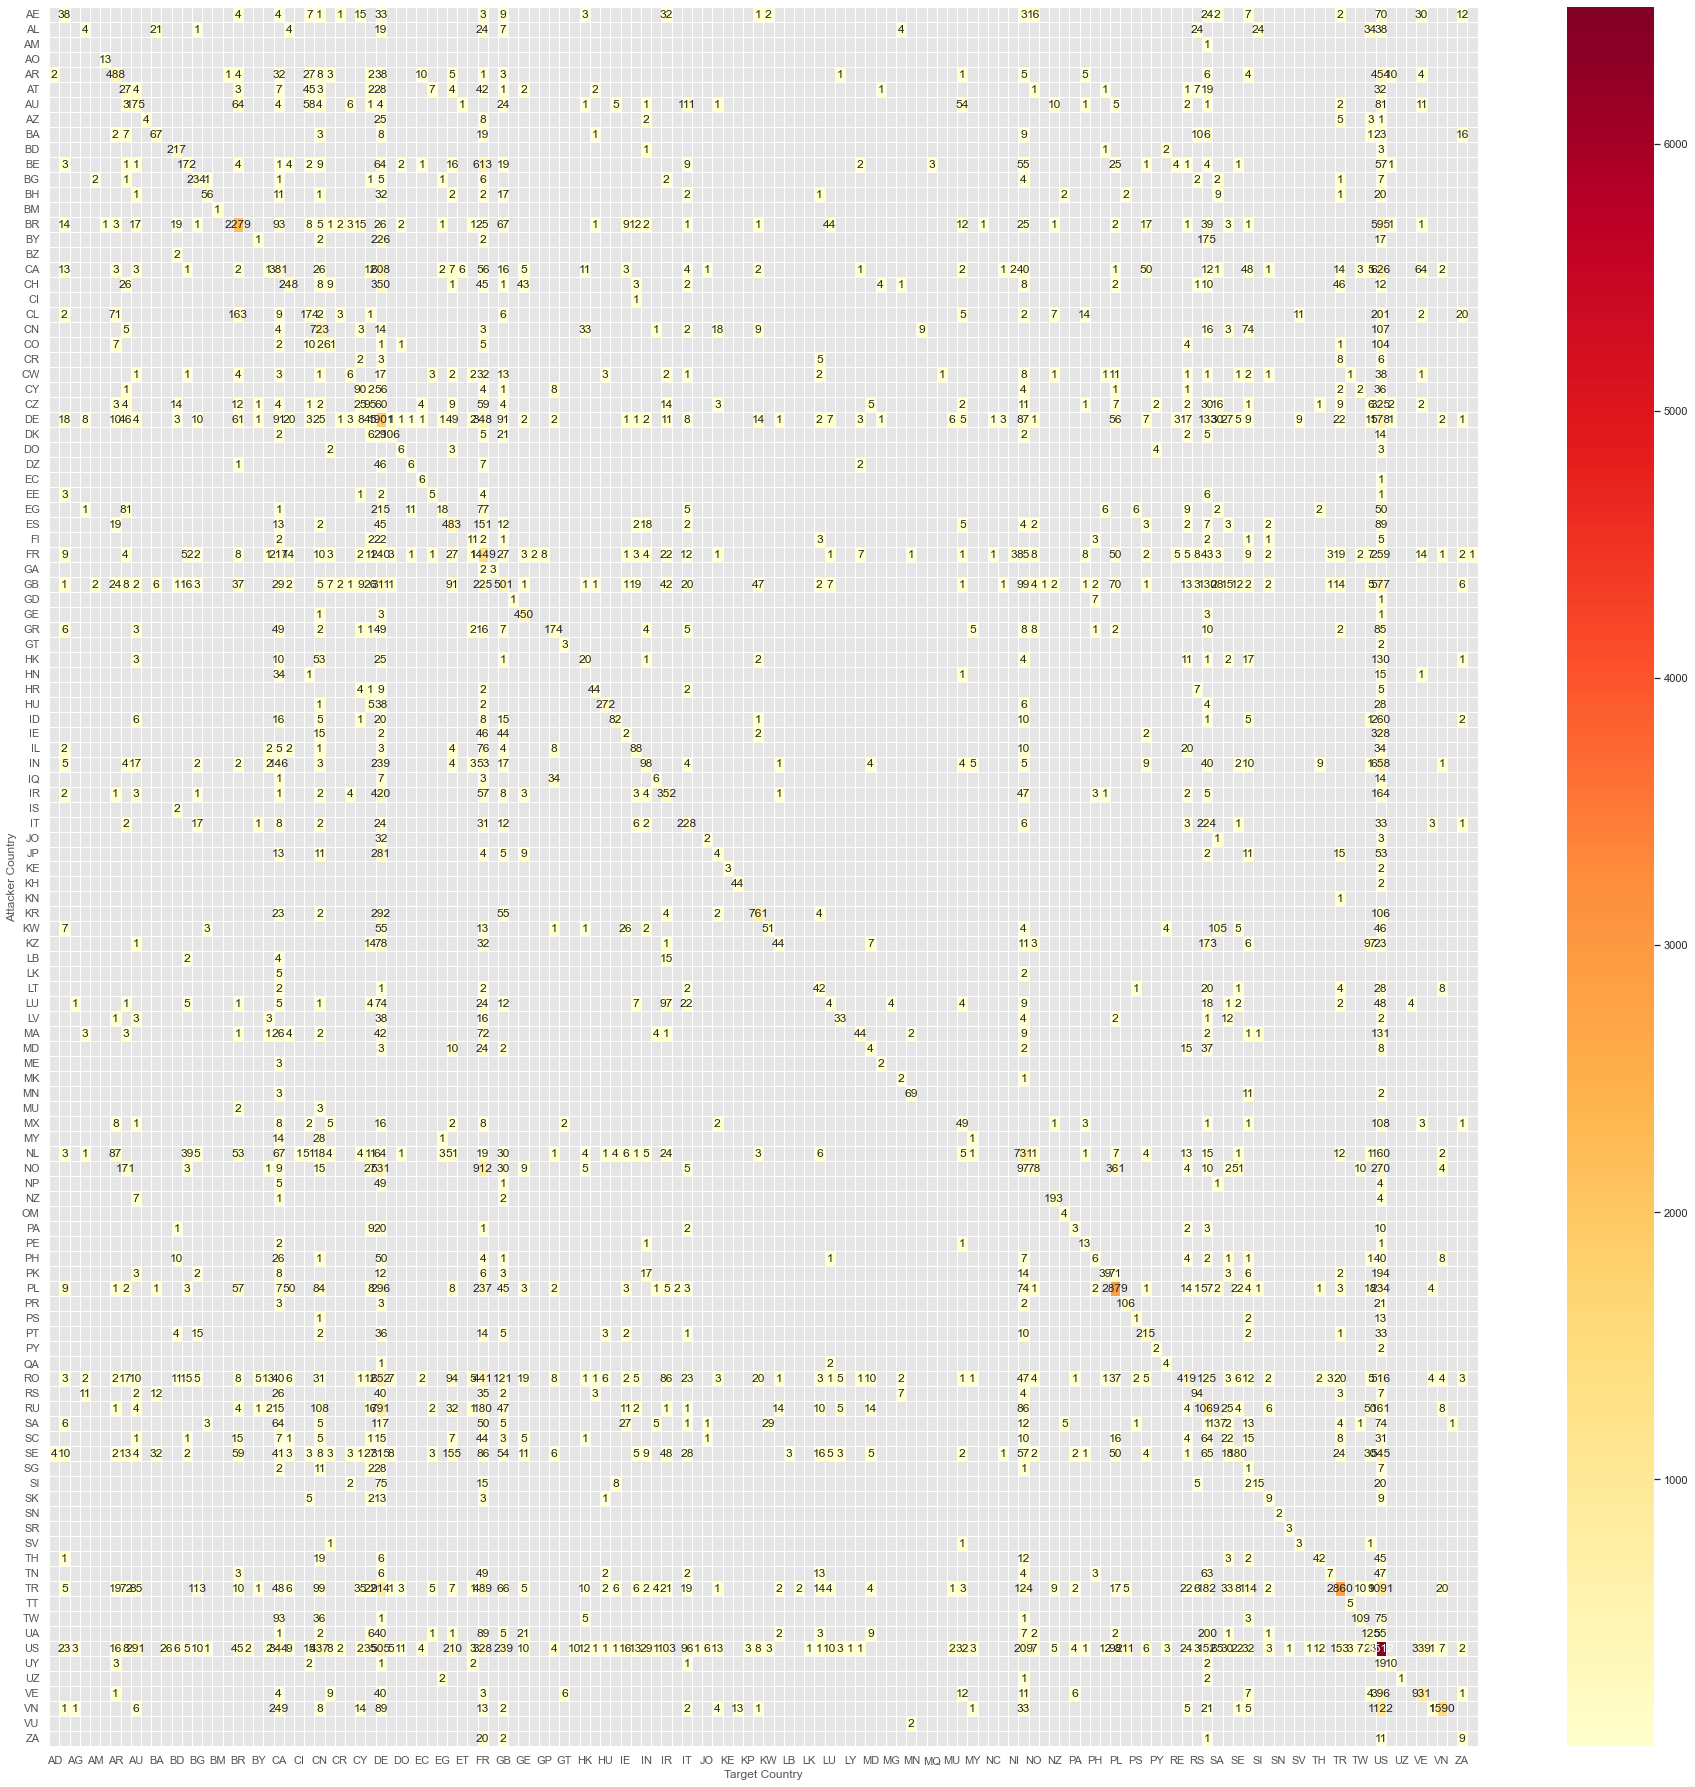

In [183]:
%run 'scripts/automated_analysis.ipynb'

Attacks from the Netherlands!

In [170]:
who_against_whom['NL'].sort_values(ascending=False).head(5)

country
NL    731.0
US    160.0
AR     87.0
CA     67.0
DE     64.0
Name: NL, dtype: float64

In [184]:
who_against_whom['NL'].sort_values(ascending=False).sum()

2143.0

Attacks against the Netherlands

In [169]:
who_against_whom.T['NL'].sort_values(ascending=False).head(5)

country
NL    731.0
US    160.0
AR     87.0
CA     67.0
DE     64.0
Name: NL, dtype: float64

In [175]:
who_against_whom.T['NL'].sort_values(ascending=False).sum()

1521.0

<h2 align="center">!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br>
Query Interface<br>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</h2> 

In [188]:
%run 'scripts/search_background.ipynb'


Searching by Country = Netherlands 

Table df_logins (as ATTACKER):


,id,userid,date,userip,useremail,username,middledate,srcip,srcasn,srccountry,as_name,srcbgp_prefix
1717,109,18,2021-11-15 23:23:44,2a02:a44a:930e:1:284b:cf73:dff8:363d,alexvangelderen1@gmail.com,dikkejonko2411,2022-01-17 00:20:53.500000,2a02:a44a:930e:1:284b:cf73:dff8:363d,[1136.0],NL,"KPN KPN National, NL",2a02:a400::/25
1718,955,18,2021-11-26 12:08:38,213.108.105.194,alexvangelderen1@gmail.com,dikkejonko2411,2022-01-17 00:20:53.500000,213.108.105.194,[47172.0],NL,"GREENHOST, NL",213.108.104.0/21
1729,268,20,2021-11-19 01:01:09,37.46.114.115,enique88@fbi.gov,enique88,2022-01-17 00:20:53.500000,37.46.114.115,[51430.0],NL,"ALTUS, NL",37.46.114.0/24
1899,194,28,2021-11-18 00:36:49,85.148.182.143,kryptnodes@protonmail.com,1MP4C7,2022-01-17 00:20:53.500000,85.148.182.143,[5390.0],NL,"EURONET, NL",85.148.0.0/16
1902,1218,28,2021-11-28 21:45:56,85.148.182.143,kryptnodes@protonmail.com,1MP4C7,2022-01-17 00:20:53.500000,85.148.182.143,[5390.0],NL,"EURONET, NL",85.148.0.0/16
...,...,...,...,...,...,...,...,...,...,...,...,...
23294,23056,24334,2022-03-24 05:32:05,185.107.70.56,terminalnorussian@gmail.com,AsianZikaBaby,2022-01-17 00:20:53.500000,185.107.70.56,[43350.0],NL,"NFORCE, NL",185.107.68.0/22
23314,23098,24355,2022-03-24 14:27:13,89.255.17.26,jdksdjh@hotmail.com,3rd,2022-01-17 00:20:53.500000,89.255.17.26,[39647.0],NL,"REDHOSTING-AS, NL",89.255.17.0/24
23422,23332,24444,2022-03-25 23:42:12,85.150.124.202,zaroxqs@gmail.com,zaroxqs,2022-01-17 00:20:53.500000,85.150.124.202,[5390.0],NL,"EURONET, NL",85.150.0.0/16
23485,23483,24502,2022-03-26 22:21:59,62.250.230.231,teamiemattt@gmail.com,teamiemattt,2022-01-17 00:20:53.500000,62.250.230.231,[50266.0],NL,"TMOBILE-THUIS, NL",62.250.128.0/17


Table df_attacks (as TARGET):


,id,userid,targetip,port,duration,type,date,end_date,server,attack,api,useremail,username,middledate,ip,targetasn,country,as_name,targetbgp_prefix,nearestlogin
19,5,1,194.59.218.1,11.0,11.0,TCP-KILL,2021-11-10 21:14:36,2021-12-01 18:23:24,28.0,1.0,NaN,xerinio@stresser.gg,xerinio,2022-01-17 00:20:53.500000,194.59.218.1,[213035],NL,"AS-SERVERION Serverion B.V., NL",194.59.218.0/24,2021-11-10 21:09:29
20,6,1,194.59.218.1,11.0,11.0,TCP-KILL,2021-11-10 21:14:54,2021-12-01 18:23:24,28.0,1.0,NaN,xerinio@stresser.gg,xerinio,2022-01-17 00:20:53.500000,194.59.218.1,[213035],NL,"AS-SERVERION Serverion B.V., NL",194.59.218.0/24,2021-11-10 21:09:29
21,7,1,194.59.218.1,11.0,11.0,TCP-KILL,2021-11-10 21:15:10,2021-12-01 18:23:24,28.0,1.0,NaN,xerinio@stresser.gg,xerinio,2022-01-17 00:20:53.500000,194.59.218.1,[213035],NL,"AS-SERVERION Serverion B.V., NL",194.59.218.0/24,2021-11-10 21:09:29
164,5890,1,178.237.56.155,80.0,600.0,LDAP,2021-12-01 09:03:39,2021-12-01 18:23:24,1.0,1.0,NaN,xerinio@stresser.gg,xerinio,2022-01-17 00:20:53.500000,178.237.56.155,[210269],NL,"HOSTCIRCLE-, NL",178.237.56.0/24,2021-12-01 08:58:10
165,5891,1,178.237.56.155,80.0,600.0,NTP,2021-12-01 09:04:01,2021-12-01 18:23:24,1.0,1.0,NaN,xerinio@stresser.gg,xerinio,2022-01-17 00:20:53.500000,178.237.56.155,[210269],NL,"HOSTCIRCLE-, NL",178.237.56.0/24,2021-12-01 08:58:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104664,104293,24423,178.85.19.230,80,60.0,FREE-NTP,2022-03-25 16:04:26,2022-03-25 16:05:26,22.0,1.0,NaN,rasmus06andersen@gmail.com,SIGGEO,2022-01-17 00:20:53.500000,178.85.19.230,[33915],NL,"TNF-AS, NL",178.85.0.0/16,2022-03-25 16:03:58
104665,104294,24423,178.85.19.230,80,60.0,FREE-NTP,2022-03-25 16:05:31,2022-03-25 16:06:31,22.0,1.0,NaN,rasmus06andersen@gmail.com,SIGGEO,2022-01-17 00:20:53.500000,178.85.19.230,[33915],NL,"TNF-AS, NL",178.85.0.0/16,2022-03-25 16:03:58
104685,104380,24435,217.63.11.172,80,60.0,FREE-LDAP,2022-03-25 22:40:42,2022-03-25 22:41:42,22.0,1.0,NaN,useruserax06@gmail.com,user9999,2022-01-17 00:20:53.500000,217.63.11.172,[33915],NL,"TNF-AS, NL",217.63.0.0/19,2022-03-25 22:39:37
104686,104610,24435,217.63.11.172,80,60.0,FREE-NTP,2022-03-26 08:28:12,2022-03-26 08:29:12,22.0,1.0,NaN,useruserax06@gmail.com,user9999,2022-01-17 00:20:53.500000,217.63.11.172,[33915],NL,"TNF-AS, NL",217.63.0.0/19,2022-03-26 08:27:46


I've found out (via https://telemetr.io/en/channels/1694113336-starkstresser/posts) that "xerinio@stresser.gg" who is the user id=1 (possibly the admin) has another Booter called https://starkstresser.net/. See that figure bellow is almost the same as the front-end of stresser.gg

![starkstresser.net](https://github.com/jjsantanna/stresser.gg_db_analysis/blob/master/figs/strakstresser.net.png?raw=true)